<h1><center> 
    
# H SAF User Workshop

## Demonstrational Session on H SAF Precipitation Products
    
## Python scripts to operate with H SAF precipitation products 
    
## Daniele Casella CNR-ISAC</center></h1>

This Jupiter Notebook is a tutorial about the reading and visualization of the H SAF precipitation products using python. This tutorial is divided in sub-sections:

1. Summary of the main file formats: GRIB, NetCDF, Bufr
2. Summary of the main geographical grids
3. Before starting: python and libraries installation
4. Codes
5. H03 example
6. H60 examples
7. Other examples
8. A look inside hsafpp.py 





## 1. Summary of the main file formats: Grib, Bufr, NetCDF

The H SAF precipitation products are available in:
* Binary format: GRIB, BUFR
* NetCDF 

Netcdf are simpler, to read and visualize, many ready-to-use tools exists to read and visualize NetCDF eg. [panoply](www.giss.nasa.gov/tools/panoply). Binary data can be more difficult.

### BUFR 
Bufr data have been used in H SAF mostly for orbital MW-based products (eg. H01 - SSMIS, H02 - MHS). In the last years these data are available also in Netcdf format. The need of using BUFR data is just for users interested in historical archived data (older than November 2020). 

This guide does not cover BUFR data, if you need to use BUFR data you need to first download and install the [ECMWF bufrdc software](https://confluence.ecmwf.int/display/BUFR/BUFRDC+Home) and download codes, instructions and some tables from the [H SAF ftp site](ftp.ftphsaf.meteoam.it/products/utilities/bufr_decode). 

Please note that the use of BUFR data needs some basic programming skills (you don't need to wite code in fortran, but you should know how to compile a fortran software and use a library).

### GRIB
Some of the H SAF precipitation products more commonly used are written in GRIB format: H03 (instantaneous precipitation at ground every 15 minutes using MW-based products and SEVIRI MSG) and H05 (accumulated precipitation at ground). This guide provides instructions and example python codes to translate GRIB data in NetCDF. The idea is to first translate a GRIB product into a more friendly format and then use the same software to reand and visualize all products.

### NetCDF
Several H SAF products are available in NetCDF format: orbital MW-based precipitation products (H01 from SSMIS, H02 from MHS, H17 from AMSR-2, H18 from ATMS, H20 from GMI), MW-based regridded products  (H67-68 integrating all available PMW- based H SAF products, H64 integrating SM2Rain with PMW) and more recently delveloped products usnig SEVIRI MSG (H60, H61, H63, H90). NetCDF data format is very friendly for any user with the help of some freely distributed tools or with any scripting language (eg. Python, MATLAB).


## 2. Summary of the main geographical grids

### Geostationary Grid
H SAF precipitation product are written considering a geographical grid. In particular products that have a main input from Geostationary satellite keep the original geostationary grid:

* 0-degrees MSG:                                  H03, H05 or the new version of them H60 and H61
* Indian Ocean Data Coverage (IODC) MSG:          H63 and H90

a a Visible/Infrared Imager on Geostationary Orbit (SEVIRI on MSG) scans the earth as:

![SegmentLocal](fig/gestoationary_scanning.gif "segment")


The resulting data in precipitation products looks like:
![Image](fig/geo_data.jpg )

Products with Geostationary grid do not have latitude and longitude corresponding to each pixrel "inside the file". It is possible however to calculate them: there is a matlab script on the Hsaf ftp utilities folder or following this tutorial.



### Low Earth Orbit Grid

All products coming from PMW radiometers:
H01  SSMIS
H02  AMSU/A MHS
H17 AMSR-2
H18 ATMS
H20 GMI

A Low Earth Orbit satellite carrying a MW radiometer scans like this:
![Image](fig/leo_scanning.jpg )


The data inside these file include the latitude and longitude for each pixel:
![Image](fig/leo_data.jpg )



### Regular Grids

These products comes from the combination of many orbital products:
H64
H67
H68

In this case the main data are a 2D matrix and the latitude and Longitude are a 1D vector:
![Image](fig/regrid_data.jpg )


## 3. Before starting: python and libraries installation

### Python
Python 3 is required for running this code on your machine. The fastest way to have python is to install the [Anaconda Package](https://www.anaconda.com/products/individual).  By the way, python can be installed on all OS, there are versions of Anaconda for Linux Mac and Windows, however this code has been tested for Linux Ubuntu 64 bit OS. 

Before starting you need to install some additional software and some python packages.


### Libraries installation 

The easiest way to get everything installed is to use pip (from a terminal or Anaconda Prompt in Windows):

<p style="background:black">
<code style="background:black;color:white"> 
    user@user:/home/user$ pip install pygrib
    
</code>
</p>


You can also use conda (from a terminal or Anaconda Prompt in Windows):

<p style="background:black">
<code style="background:black;color:white"> 
    user@user:/home/user$ conda install -c conda-forge pygrib
    
</code>
</p>


the NetCDF library is also needed it should be already installed if you are using Anaconda, however you can install it with pip:

<p style="background:black">
<code style="background:black;color:white"> 
    user@user:/home/user$ pip install netcdf4
    
</code>
</p>

 

Moreover some further libraries are needed for plotting: 

*  matplotlib should be already installed if you are using the Anaconda tool as suggested, it is used for generic plotting.

* basemap is a library for plotting maps
* imageio and pygifsicle are needed for producing animated gifs, install them if you need to do that

you can install basemap by running from terminal:

<p style="background:black">
<code style="background:black;color:white"> 
    user@user:/home/user$ conda install basemap
    
</code>
</p>

and imageio and pygifsicle (if you need to produce gifs) with:

<p style="background:black">
<code style="background:black;color:white"> 
    user@user:/home/user$ conda install imageio    
    user@user:/home/user$ conda install -c condaforge pygifsicle
    
</code>
</p>




## 4. Codes

The codes in the gitHub are organized as a series of examples:

* h03example.py
* h05example.py
* h60example1.py
* h60example2.py
* h60example3.py
* h90example.py
* hsaf_orbital_example.py
* hsaf_regrid_example.py

and a python script with all the function used in this tutorial: 

* hsafpp.py

This script allows the user to easily read and plot all H SAF precipitation products.


## 5. h03 example

as well as any other example the h03example.py file is divided in sections. The first section is a description of the code:

```
#!/usr/bin/env python3
#-*- coding: utf-8 -*-

Created on Tue Jan 11 18:12:43 2022

@author: Daniele Casella Paolo Sano', ISAC CNR

#version 1.0

#example script to:
    1 translate some H03 file from GRIB to NetCDF
    2 read the created Netcdf files
    3 plot a png image for each file
    4 save all images as a gif animation
```

Then a section that can be modified by the user in order to set up the example:


In [1]:
# This section should be modified by the user with the desired settings 

#---------------------------------------------------------------------------------------
# these numbers set the latitude and longitude limits
latlim=[36,47] #degrees north
lonlim=[6,19]  #degrees east

# set the proper product ID (pid)
pid='h03'
# pid='h05'
# pid='h60'
# pid='h61'

# set input path with grib files (it can be a single file)
grib_path='./H03B1/h03B_20220108_0000_fdk.grb.gz'
# set output path where you want the netcdf files
nc_path='./H03B1'
# set output path where you want the images
png_path='./H03B1'

# set the images extention
imageext='.png'
# set to true if you want a gif to be produced
dogif=False


latlim and lonlim are used to set up the border of the images. In this case the final image will included in  36°N to 47°N in latitude and 6 °W to 19°W.

pid defines the kind of HSAF precipitation file you are reading and plotting, it can be h03, h03B, h05m h60,h61, h63, h90

then the path to the folder where the input data are stored and where the output data and images will be produced must be set as well. In our case grib_path is a folder with multiple .grb.gz files. All files will be processed. grib_path can also point to a single file (in this case only that file will be processed).

Finaly the user cha choose the format of the image produced and if an animated gif as a final product. This setting makes sense only if you are processing multiple files from the same directory. 



The following section contains the calls to the hsapp functions to:

### 1. transform the grib files in netcdf



In [2]:
#---------------------------------------------------------------------------------------
# This section should not be modified by the user (unless you know what you are doing)

import hsafpp

lst1,outpt=hsafpp.listFiles(grib_path,nc_path,ext2find='.grb.gz')

for infilename in lst1:
    xvar=hsafpp.define_main_variable(pid,infilename)
    outfilename=hsafpp.grib2nc(xvar,infilename,latlim,lonlim,outpt)
    print(outfilename +'  processed')
    

./H03B1/h03B_20220108_0000_fdk.nc  processed


First the xvar variables (with all read data) is initialized

then a list of 'grb.gz' files is composed.
Then for any element of the list of files the function grib2nc is called.

The output should look like:

./H03B1/h03B_20220108_0000_fdk.nc  processed


### 2. read the produced NetCDF files and plot




/media/fenrir/disk1/HsafUserWorkshp2022/hsafpp.py:413: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  im1 = m.pcolor(xvar['lon'],xvar['lat'],xvar['values'],shading='nearest',cmap=cmap0,latlon=True,vmin=colorAxisMin,vmax=colorAxisMax)


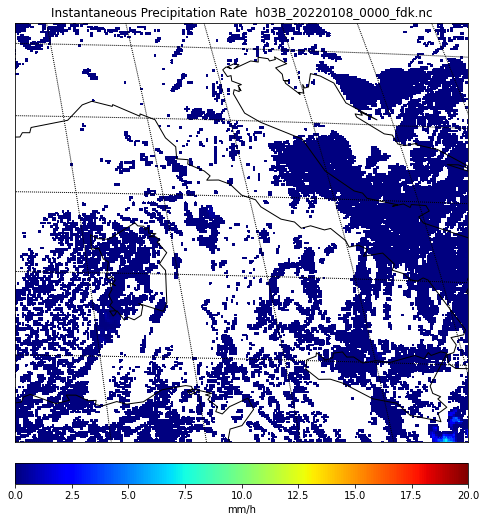

./H03B1/h03B_20220108_0000_fdk.png  done


In [3]:
lst2,outpt=hsafpp.listFiles(nc_path,png_path,ext2find='.nc') 
lst3=[]

for infilename in lst2:
    xvar=hsafpp.ncfileRead(infilename,xvar)
    outfilename=hsafpp.plotPrecip(xvar,infilename,outpt,imageext,latlim,lonlim)  
    lst3.append(outfilename)
    print(outfilename +'  done')

Again, first a list of '.nc' netcdf files is composed, then a loop over each element of the list runs the functions ncfileread (that reads the netcdf files) and plotPrecip (plotting images). The file name of every image produced is appended in a third list of files (lst3)


### 3. create the gif animation


In [ ]:
if dogif:
    outfilegif=hsafpp.makeGif(lst3,outpt)
    print()
    print(outfilegif +'  done')

the function to create gifs is makeGif




## 6. H60 examples
The h60 example files are very similar to the previous one. First file h60example1.py contains various sections: a first sections with comments and description and a section that can be modified ny the user with the main settings:



In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 11 18:12:43 2022

@author: Daniele Casella Paolo Sano', ISAC CNR

# version 1.0

# example script to:
    1 translate some H05 file from GRIB to NetCDF
    2 read the created Netcdf files
    3 plot a png image for each file
    4 save all images as a gif animation
"""


# This section should be modified by the user with the preferred settings 

#---------------------------------------------------------------------------------------
# these numbers set the latitude and longitude limits
latlim=[0,60] #degrees north
lonlim=[-60,60]  #degrees east


# set the proper product ID (pid)
# pid='h03'
# pid='h05'
pid='h60'
# pid='h61'



#set output path with the netcdf files
nc_path='./h60/h60_20220108_0000_fdk.nc'
# set output path where you want the images
png_path='./h60'

#set the images extention
imageext='.png'
#set to true if you want a gif to be produced
dogif=False
#dogif=True
#---------------------------------------------------------------------------------------

 then a section that runs the main functions from hsafpp:
 


./h60/h60_20220108_0000_fdk.png  done


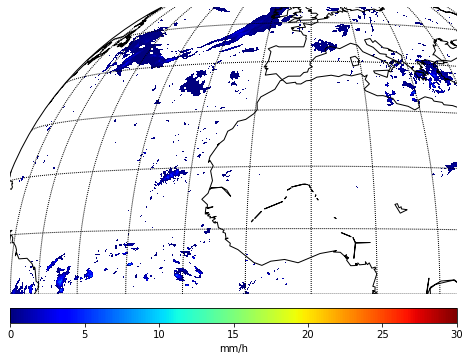

In [11]:
#---------------------------------------------------------------------------------------
# This section should not be modified by the user (unless you know what you are doing)
import hsafpp


    
lst2,outpt=hsafpp.listFiles(nc_path,png_path,ext2find='.nc') 
lst3=[]

for infilename in lst2:
    xvar=hsafpp.define_main_variable(pid,infilename)
    xvar=hsafpp.ncfileRead(infilename,xvar)
    outfilename=hsafpp.plotPrecip(xvar,infilename,outpt,imageext,latlim,lonlim)   
    lst3.append(outfilename)
    print(outfilename +'  done')

if dogif:
    outfilegif=hsafpp.makeGif(lst3,outpt)
    print()
    print(outfilegif +'  done')

 if you want to visualize the full product set the latlim and lonlim parameters to empty lists (as in h60example2.py:


In [6]:
latlim=[] #degrees north
lonlim=[]  #degrees east


./h60/h60_20220108_0000_fdk.png  done


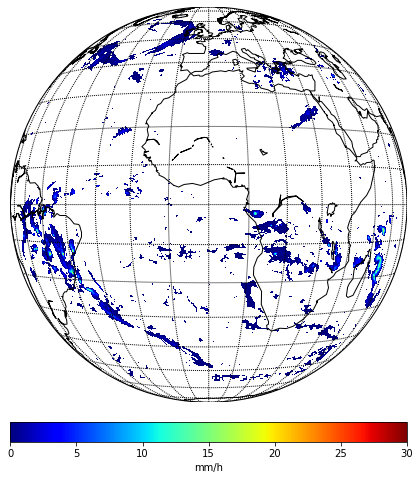

In [7]:
# This section should not be modified by the user (unless you know what you are doing)
import hsafpp

   

#lst2,outpt=hsafpp.listFiles(nc_path,png_path,ext2find='.nc') 
lst2,outpt=hsafpp.listFiles(nc_path,png_path,ext2find='.nc') 
lst3=[]

for infilename in lst2:
    xvar=hsafpp.define_main_variable(pid,infilename)
    xvar=hsafpp.ncfileRead(infilename,xvar)
    outfilename=hsafpp.plotPrecip(xvar,infilename,outpt,imageext,latlim,lonlim)   
    lst3.append(outfilename)
    print(outfilename +'  done')

if dogif:
    outfilegif=hsafpp.makeGif(lst3,outpt)
    print()
    print(outfilegif +'  done')

h60example3.py process all files in the h60 folder and create a gif

./h60/h60_20220108_0000_fdk.nc.png  done
./h60/h60_20220108_0015_fdk.nc.png  done
./h60/h60_20220108_0030_fdk.nc.png  done
./h60/h60_20220108_0045_fdk.nc.png  done
./h60/h60_20220108_0100_fdk.nc.png  done
./h60/h60_20220108_0115_fdk.nc.png  done
./h60/h60_20220108_0130_fdk.nc.png  done
./h60/h60_20220108_0145_fdk.nc.png  done
./h60/h60_20220108_0200_fdk.nc.png  done


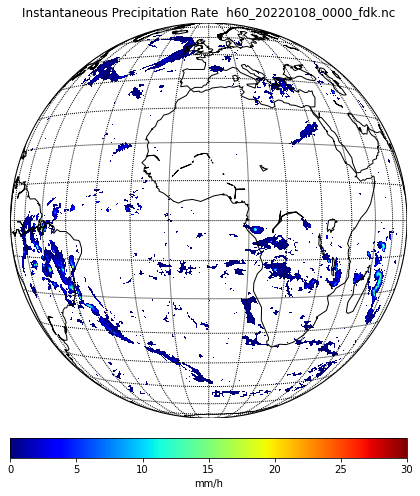

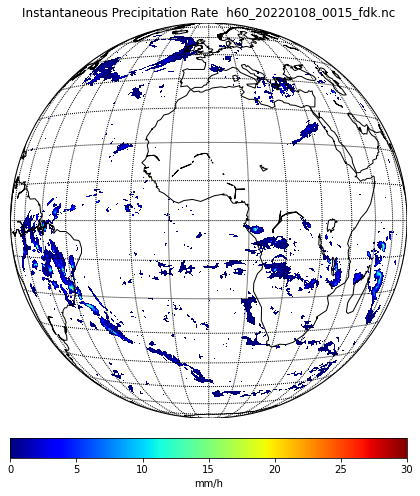

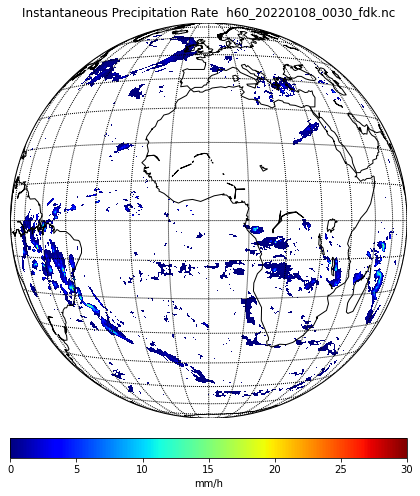

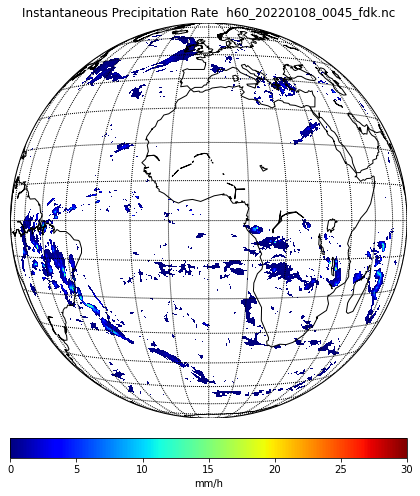

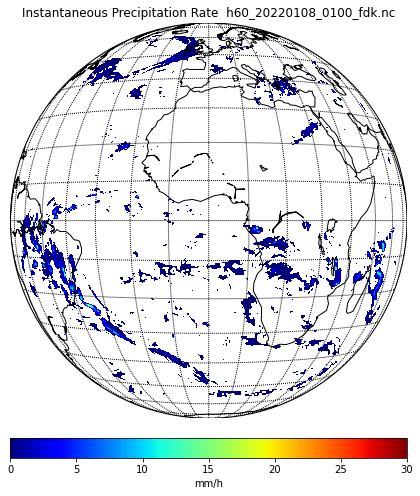

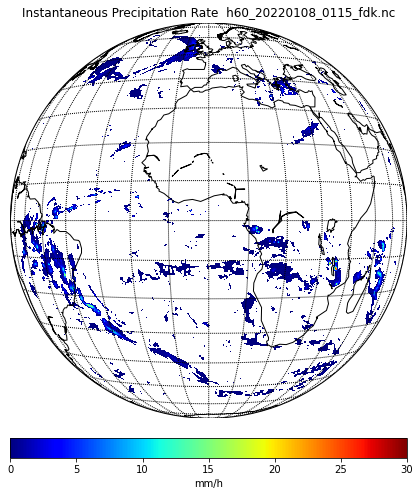

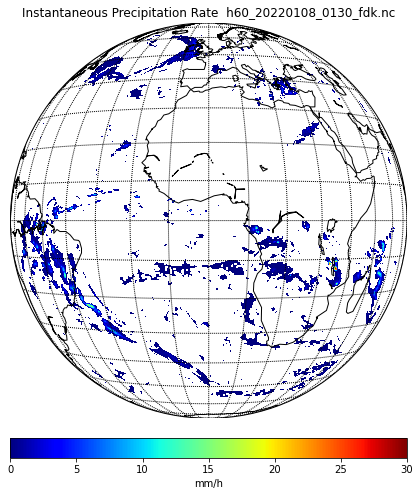

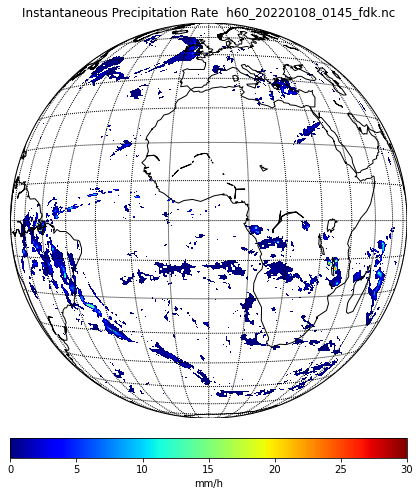

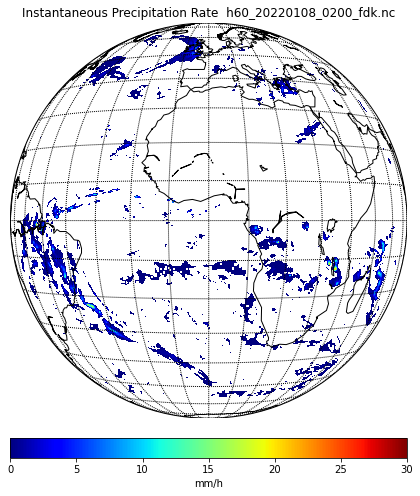

In [5]:
#
# This section should be modified by the user with the preferred settings 

#---------------------------------------------------------------------------------------
# these numbers set the latitude and longitude limits
# latlim=[0,60] #degrees north
# lonlim=[-60,60]  #degrees east
latlim=[] #degrees north
lonlim=[]  #degrees east

# set the proper product ID (pid)
# pid='h03'
# pid='h05'
pid='h60'
# pid='h61'



#set output path with the netcdf files
nc_path='./h60'
# set output path where you want the images
png_path='./h60'

#set the images extention
imageext='.png'
#set to true if you want a gif to be produced
#dogif=False
dogif=True
#---------------------------------------------------------------------------------------
# This section should not be modified by the user (unless you know what you are doing)
import hsafpp


    

#lst2,outpt=hsafpp.listFiles(nc_path,png_path,ext2find='.nc') 
lst2,outpt=hsafpp.listFiles(nc_path,png_path,ext2find='.nc.gz') 
lst3=[]

for infilename in lst2:
    xvar=hsafpp.define_main_variable(pid,infilename)
    xvar=hsafpp.ncfileRead(infilename,xvar)
    outfilename=hsafpp.plotPrecip(xvar,infilename,outpt,imageext,latlim,lonlim)   
    lst3.append(outfilename)
    print(outfilename +'  done')

if dogif:
    outfilegif=hsafpp.makeGif(lst3,outpt)
    print()
    print(outfilegif +'  done')



and finally plotting the gif animation

In [6]:
if dogif:
    outfilegif=hsafpp.makeGif(lst3,outpt)
    print()
    print(outfilegif +'  done')


./h60/h60_20220108_0000_fdk.nc.pngh60_20220108_0200_fdk.nc.png.gif  done


that looks like

![SegmentLocal](fig/h60_20220108_0000_fdk.nc.pngh60_20220108_0200_fdk.nc.png.gif "segment")

## 7. Other Examples
hte github contains several other example files, for reading and plotting other H SAF precipitation products, the user is encouraged to run them by its own and to modify both the hsafpp and the examples for their needs.

In particular:

h90example.py reads and plot a single h90 product (accumulated precipitation on the IODC MSG grid)

hsaf_regrid_example.py process a single file from H64, H67 and H68 products (all regridded products)

hsaf_orbital_example.py process a single file from various orbital PMW based products.



## 8. A look inside hsafpp


hsafpp is composed by a number of functions some of them may worth some further look:
```
def define_main_variable(pid,infilename):
    
    if pid=='auto':
        pid=os.path.basename(infilename)[0:3]
        
    xvar={}
    
        
    xvar['pid']=pid
    xvar['value']=0 
    xvar['qind']=0
    xvar['lat']=[] 
    xvar['lon']=[] 
    xvar['time']=0 
    xvar['attributes']={}
    if pid=='h03' or pid=='h03B':       
        xvar['shortname']='rainRate'
        xvar['bias']=3600  #multiplicative bias
        xvar['unit']='mm/h'  # it is in kg/m^2/s in grib files   *3600 becomes  mm/h
        xvar['label']='Instantaneous Precipitation Rate'
        xvar['standard_name']='Instantaneous_rain_rate'
        xvar['gribName']='Instantaneous rain rate'
        xvar['ncName']='rr'
        xvar['stdRange']=[0, 20]
        
    elif pid=='h05' or pid=='h05B' or pid=='h61' or pid=='h90' or pid=='h64':
        xvar['shortname']='rain'
        xvar['bias']=1
        xvar['unit']='mm'
        xvar['label']='Accumulated Precipitation '
        xvar['standard_name']='Accumulated_rain'
        xvar['gribName']='Estimated precipitation'
        xvar['ncName']='acc_rr'     
        xvar['stdRange']=[0, 50]
        
    elif pid=='h60' or pid=='h63' or pid=='h67' or pid=='h68':
        xvar['shortname']='rainRate'
        xvar['bias']=1  #multiplicative bias
        xvar['unit']='mm/h'  
        xvar['label']='Instantaneous Precipitation Rate'
        xvar['standard_name']='Instantaneous_rain_rate'
        xvar['gribName']='Instantaneous rain rate'
        xvar['ncName']='rr'
        xvar['stdRange']=[0, 30]

    elif pid=='h01' or pid=='h02' or pid=='h17' or pid=='h18'or pid=='h20':
        xvar['shortname']='rainRate'
        xvar['bias']=1  #multiplicative bias
        xvar['unit']='mm/h'  
        xvar['label']='Instantaneous Precipitation Rate'
        xvar['standard_name']='Instantaneous_rain_rate'
        xvar['gribName']='Instantaneous rain rate'
        xvar['ncName']='rr'
        xvar['stdRange']=[0, 30]
        
    return xvar
```

this function defines xvar as a _dictionary_ that will contain the data (latitude, longitude, rain rate,etc). Some keys of the dictionary (e.g. label, stdRange) are used for plots, other (gribName, ncName) for reading the file. The key "bias" is a multiplicative bias that should be applied only to h03 in order to change the units from kg/m^2 to mm/h. The xvar variable is initialized depending on the value of the "pid" variable, that is the code of the product you want to plot/read.

There is also the possibility to launch this function with:
``` pid='auto  ```

in this case the pid is automatically set by the function, it will be equal to the first 3 characters of the filename.


Another function that you may want to look at is:

```
def plotPrecipGEOS(xvar,latcorners,loncorners):
    
    #plot a single file to a map

    colorAxisMin=xvar['stdRange'][0]
    colorAxisMax=xvar['stdRange'][1]

    # create figure and axes instances
    fig = plt.figure(figsize=(8,8))
    
    m = Basemap(projection='geos',
            rsphere=(xvar['r_eq'],xvar['r_pol']),
            resolution='c',
            area_thresh=10000.,
            lon_0=xvar['sub-satellite_longitude'],
            satellite_height=xvar['satellite_altitude'])
    
    cmap0=myCbar()
    rr=np.fliplr(xvar['values'])
    #rr[rr==0]=np.nan
    im1=m.imshow(rr,cmap=cmap0,vmin=colorAxisMin,vmax=colorAxisMax)
    m.drawcoastlines() 
    # set parallels and meridians
    setParallelsMeridians(latcorners,loncorners,m)
    
    # add colorbar.
    cbar = m.colorbar(location='bottom',pad="5%")
    cbar.set_label(xvar['unit'])
    
    # set limits
    if len(latcorners)==2 and len(loncorners)==2:
        xmin, ymin = m(loncorners[0], latcorners[0])
        xmax, ymax = m(loncorners[1], latcorners[1])
        
        ax = plt.gca()
        
        ax.set_xlim([xmin, xmax])
        ax.set_ylim([ymin, ymax])

    # add title
    plt.title(xvar['label']+'  '+ xvar['file'])
    
    return fig
    ```
    
    that plots most products (all products in netcdf format using MSG, such as h60, h61, h63 and h90). 
    For this function some hints may come from the [matplotlib basemap webpage](https://matplotlib.org/basemap/users/index.html),  however some important informations are that the data are mapped as "images" with imshow over a pre- created geostationary projection. The parameters of the geostationary projection comes directly from the file (they  work for both 0-deg and IODC).
    
    